In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
arabi_genes = pd.read_csv('/data/passala/Module_paper_data/Arabi_tomato_heat_stress_comparison/Ortho_vs_gene_files/arabi_genes.csv', index_col= 0)
arabi_ortho = pd.read_csv('/data/passala/Module_paper_data/Arabi_tomato_heat_stress_comparison/Ortho_vs_gene_files/arabi_random.csv', index_col= 0)
tomato_genes = pd.read_csv('/data/passala/Module_paper_data/Arabi_tomato_heat_stress_comparison/Ortho_vs_gene_files/tomato_genes.csv', index_col= 0)
tomato_ortho = pd.read_csv('/data/passala/Module_paper_data/Arabi_tomato_heat_stress_comparison/Ortho_vs_gene_files/tomato_random.csv', index_col= 0)

In [3]:
log_fc_change_evaluation_value = 1.5
log_fc_change_evaluation_value_negative = -1*log_fc_change_evaluation_value

In [4]:
tomato_ortho

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
10772at3193,233.107013,-1.241263,0.223840,-5.545319,2.934180e-08,1.217251e-07
10950at3193,5488.204147,-1.567001,0.310572,-5.045531,4.522629e-07,1.611741e-06
109808at3193,48.227906,0.202125,0.309453,0.653169,5.136476e-01,5.750849e-01
109859at3193,59.337757,-0.792314,0.282285,-2.806788,5.003821e-03,9.408045e-03
109895at3193,4855.339200,0.406535,0.196136,2.072723,3.819808e-02,5.972955e-02
...,...,...,...,...,...,...
9499at3193,1200.175580,-2.195120,0.388932,-5.643965,1.661782e-08,7.120522e-08
9592at3193,294.866887,0.193645,0.164020,1.180622,2.377528e-01,3.011260e-01
9609at3193,130.646515,0.068489,0.185068,0.370073,7.113280e-01,7.575227e-01
9789at3193,167.933798,2.447661,0.303712,8.059163,7.681870e-16,6.783060e-15


In [5]:
trimmed_tomato_ortho = tomato_ortho.loc[tomato_ortho.index.isin(arabi_ortho.index)]
trimmed_arabi_ortho = arabi_ortho.loc[arabi_ortho.index.isin(trimmed_tomato_ortho.index)]


In [6]:
trimmed_arabi_ortho_named = trimmed_arabi_ortho.rename(columns = {'log2FoldChange':'Arabidopsis Log2FC'})
trimmed_tomato_ortho_named = trimmed_tomato_ortho.rename(columns = {'log2FoldChange':'Tomato Log2FC'})



In [7]:
merged_ortho_df = trimmed_arabi_ortho_named[['Arabidopsis Log2FC']].merge(right = trimmed_tomato_ortho_named, left_index= True, right_index = True)

In [8]:
merged_ortho_df

,Arabidopsis Log2FC,baseMean,Tomato Log2FC,lfcSE,stat,pvalue,padj
Locus,,,,,,,
10950at3193,-0.041438,5488.204147,-1.567001,0.310572,-5.045531,4.522629e-07,1.611741e-06
109808at3193,0.394288,48.227906,0.202125,0.309453,0.653169,5.136476e-01,5.750849e-01
109895at3193,0.388100,4855.339200,0.406535,0.196136,2.072723,3.819808e-02,5.972955e-02
110108at3193,0.430556,622.619926,-1.496649,0.190372,-7.861691,3.789812e-15,3.061326e-14
110263at3193,0.976183,757.430716,-1.476835,0.178475,-8.274746,1.287293e-16,1.184636e-15
...,...,...,...,...,...,...,...
8999at3193,-0.058563,303.108249,0.486662,0.193896,2.509917,1.207596e-02,2.115475e-02
9379at3193,0.302724,3027.657530,0.228159,0.132483,1.722180,8.503686e-02,1.224677e-01
9592at3193,0.410566,294.866887,0.193645,0.164020,1.180622,2.377528e-01,3.011260e-01


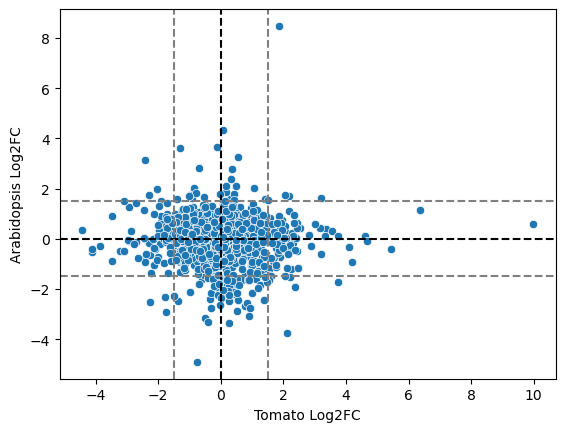

In [9]:
sns.scatterplot(data = merged_ortho_df, x ='Tomato Log2FC', y = 'Arabidopsis Log2FC' )
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(1.5, color="grey", linestyle="--")
plt.axhline(1.5, color="grey", linestyle="--")
plt.axvline(-1.5, color="grey", linestyle="--")
plt.axhline(-1.5, color="grey", linestyle="--")

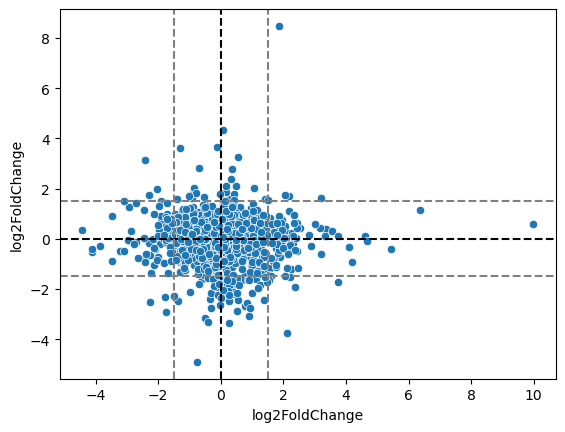

In [10]:
sns.scatterplot(x =trimmed_tomato_ortho['log2FoldChange'], y = trimmed_arabi_ortho['log2FoldChange'], )
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(1.5, color="grey", linestyle="--")
plt.axhline(1.5, color="grey", linestyle="--")
plt.axvline(-1.5, color="grey", linestyle="--")
plt.axhline(-1.5, color="grey", linestyle="--")

In [11]:
trimmed_arabi_ortho

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Locus,,,,,,
10950at3193,47.218761,-0.041438,0.327164,-0.126657,0.899212,0.938310
109808at3193,75.246378,0.394288,0.261315,1.508864,0.131334,0.248999
109895at3193,1269.689714,0.388100,0.294311,1.318671,0.187279,0.320809
110108at3193,684.204047,0.430556,0.445459,0.966544,0.333772,0.487284
110263at3193,178.920576,0.976183,0.363942,2.682251,0.007313,0.025198
...,...,...,...,...,...,...
8999at3193,2963.949468,-0.058563,0.224249,-0.261154,0.793974,0.868603
9379at3193,607.931306,0.302724,0.189039,1.601387,0.109291,0.218478
9592at3193,91.924037,0.410566,0.330065,1.243892,0.213539,0.350051


In [12]:
all(trimmed_arabi_ortho.index == trimmed_tomato_ortho.index)

True

In [13]:
merged_result = pd.DataFrame(data = zip(trimmed_tomato_ortho['log2FoldChange'], trimmed_arabi_ortho['log2FoldChange']), columns = ['Tomato','Arabi'])

all_over_1 = merged_result.loc[(merged_result['Tomato']>log_fc_change_evaluation_value) & (merged_result['Arabi']>log_fc_change_evaluation_value)]
all_under_1 = merged_result.loc[(merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (merged_result['Arabi']<log_fc_change_evaluation_value_negative)]
discord_bottom = merged_result.loc[(merged_result['Tomato']>log_fc_change_evaluation_value) & (merged_result['Arabi']<log_fc_change_evaluation_value_negative)]
discord_top = merged_result.loc[(merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (merged_result['Arabi']>log_fc_change_evaluation_value)]

In [14]:
merged_result['Classification'] = 'Non-substantial'
merged_result['Classification'].loc[(merged_result['Tomato']>log_fc_change_evaluation_value) & (merged_result['Arabi']>log_fc_change_evaluation_value)] = 'Substantial'
merged_result['Classification'].loc[(merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (merged_result['Arabi']<log_fc_change_evaluation_value_negative)]= 'Substantial'
merged_result['Classification'].loc[(merged_result['Tomato']>log_fc_change_evaluation_value) & (merged_result['Arabi']<log_fc_change_evaluation_value_negative)]= 'Substantial'
merged_result['Classification'].loc[(merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (merged_result['Arabi']>log_fc_change_evaluation_value)]= 'Substantial'

/tmp/ipykernel_433276/2994845458.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  merged_result['Classification'].loc[(merged_result['Tomato']>log_fc_change_evaluation_value) & (merged_result['Arabi']>log_fc_change_evaluation_value)] = 'S

Text(0, 0.5, 'Orthogroup-wise log2-fold change in Arabidopsis')

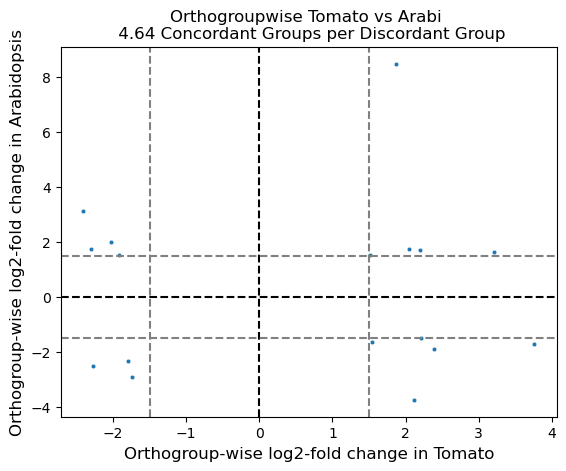

In [15]:
sns.scatterplot(data = merged_result.loc[merged_result['Classification'] == "Substantial"] , x ='Tomato', y = 'Arabi', s = 10)
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(1.5, color="grey", linestyle="--")
plt.axhline(1.5, color="grey", linestyle="--")
plt.axvline(-1.5, color="grey", linestyle="--")
plt.axhline(-1.5, color="grey", linestyle="--")
plt.title('Orthogroupwise Tomato vs Arabi \n 4.64 Concordant Groups per Discordant Group')
plt.xlabel("Orthogroup-wise log2-fold change in Tomato", fontsize = 12)
plt.ylabel("Orthogroup-wise log2-fold change in Arabidopsis", fontsize = 12)

In [16]:
discord_ratio = (len(all_over_1)+len(all_under_1))/(len(discord_bottom)+len(discord_top))
discord_ratio

0.8888888888888888

In [18]:
discord_bottom

,Tomato,Arabi
384,1.899115,-1.508002
486,2.910356,-1.721693
711,3.394706,-3.619143
857,2.780570,-2.426363
1283,3.786250,-2.972554
1469,2.135621,-2.088529
1633,1.755973,-1.948910
2030,1.669355,-1.568641
2288,2.270514,-2.237606


In [19]:
discord_top

,Tomato,Arabi
295,-1.842612,1.669353
326,-1.989824,1.829417
1311,-1.918612,1.866226
1864,-1.530858,1.707208
2013,-2.532549,1.991783


In [20]:
merged_result = pd.DataFrame(data = zip(trimmed_tomato_ortho['log2FoldChange'], trimmed_arabi_ortho['log2FoldChange']), columns = ['Tomato','Arabi'])
pos_thresh = 1
neg_thresh = 1
tomato_any_change = merged_result.loc[(merged_result['Tomato']>pos_thresh)|(merged_result['Tomato']<neg_thresh)]
tomato_concordant_change = merged_result.loc[((merged_result['Tomato']>pos_thresh) & (merged_result['Arabi']>pos_thresh)) | ((merged_result['Tomato']<neg_thresh) & (merged_result['Arabi']<neg_thresh))]
tomato_disconcordant_change = merged_result.loc[((merged_result['Tomato']>pos_thresh) & (merged_result['Arabi']<neg_thresh)) | ((merged_result['Tomato']<neg_thresh) & (merged_result['Arabi']>pos_thresh))]
percent_concordant_tomato = len(tomato_concordant_change)/len(tomato_any_change)
percent_non_discord_tomato = len(tomato_concordant_change)/(len(tomato_concordant_change+tomato_disconcordant_change))
print(percent_concordant_tomato)
print(percent_non_discord_tomato)


arabi_any_change = merged_result.loc[(merged_result['Arabi']>pos_thresh)|(merged_result['Arabi']<neg_thresh)]
arabi_concordant_change = merged_result.loc[((merged_result['Arabi']>pos_thresh) & (merged_result['Tomato']>pos_thresh)) | ((merged_result['Arabi']<neg_thresh) & (merged_result['Tomato']<neg_thresh))]
arabi_disconcordant_change = merged_result.loc[((merged_result['Arabi']>pos_thresh) & (merged_result['Tomato']<neg_thresh)) | ((merged_result['Arabi']<neg_thresh) & (merged_result['Tomato']>pos_thresh))]

percent_concordant_arabi = len(arabi_concordant_change)/len(arabi_any_change)
percent_non_discord_arabi = len(arabi_concordant_change)/(len(arabi_concordant_change+arabi_disconcordant_change))

print(percent_concordant_arabi)
print(percent_non_discord_arabi)

0.8390092879256966
0.8390092879256966
0.8390092879256966
0.8390092879256966


In [21]:
arabi_disconcordant_change

,Tomato,Arabi
13,3.553103,0.021698
32,0.099136,1.375837
39,2.266930,0.392072
41,2.294521,-0.915275
45,-0.582823,1.244660
...,...,...
2524,-1.236860,1.089510
2531,1.975633,-0.703370
2537,1.243977,-0.141292
2538,1.495888,0.088942


In [22]:
tomato_any_change

,Tomato,Arabi
0,-0.539760,0.406151
1,-0.201772,-0.128110
2,-0.531554,0.837602
3,0.484910,0.031778
4,0.081249,0.186383
...,...,...
2579,-0.345216,0.606274
2580,-1.307582,-0.299736
2581,-2.001733,0.008053
2582,0.608964,0.516576


In [23]:
tomato_concordant_change

,Tomato,Arabi
0,-0.539760,0.406151
1,-0.201772,-0.128110
2,-0.531554,0.837602
3,0.484910,0.031778
4,0.081249,0.186383
...,...,...
2579,-0.345216,0.606274
2580,-1.307582,-0.299736
2581,-2.001733,0.008053
2582,0.608964,0.516576


In [24]:
arabidopsis_tomato_nm = pd.read_csv('/data/passala/OrthoDB_data/V_11_NM_with_NCBI/tomato_to_arabidopsis_ortholog_NM.csv')

In [25]:
arabidopsis_tomato_nm = arabidopsis_tomato_nm.drop_duplicates(subset = 'arabidopsis Symbol',)
arabidopsis_tomato_nm = arabidopsis_tomato_nm.drop_duplicates(subset = 'tomato Symbol',)
arabidopsis_tomato_nm

,tomato OrthoGene,arabidopsis OrthoGene,Orthogroup,tomato Symbol,arabidopsis Symbol
0,4081_0:002534,3702_0:006584,10009at3193,LOC101245541,AT5G42200
2,4081_0:0044e5,3702_0:001f5f,10092at3193,GLYMA_04G056600,AT2G26300
3,4081_0:0060db,3702_0:000e32,10147at3193,LOC101260909,AT1G73910
5,4081_0:001ce5,3702_0:000573,10228at3193,LOC101262196,AT1G49040
6,4081_0:00485f,3702_0:0012bf,10238at3193,LOC101260971,AT1G79120
...,...,...,...,...,...
53411,4081_0:001e35,3702_0:00121f,9828at3193,LOC101268561,AT1G74750
53413,4081_0:00467b,3702_0:0052b3,9836at3193,LOC101260957,AT5G11380
53414,4081_0:003e73,3702_0:001def,9877at3193,LOC101258079,AT2G42790
53420,4081_0:00201e,3702_0:00114d,9919at3193,LOC101252265,AT1G15440


In [26]:
arabi_genes_trimmed = arabi_genes.merge(how = 'inner', left_index= True, right = arabidopsis_tomato_nm[['tomato Symbol','arabidopsis Symbol']], right_on= 'arabidopsis Symbol')
arabi_genes_trimmed = arabi_genes_trimmed.drop_duplicates(subset = 'tomato Symbol', keep = False)
arabi_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,tomato Symbol,arabidopsis Symbol
38398,279.396501,0.829771,0.279715,2.966485,3.012254e-03,1.133821e-02,LOC101253248,AT1G01020
37840,1560.891356,-0.150399,0.209296,-0.718593,4.723916e-01,6.125629e-01,AT1G01040,AT1G01040
36328,1068.595456,-0.225000,0.158336,-1.421025,1.553096e-01,2.712849e-01,LOC101264169,AT1G01050
44489,459.968316,-4.223427,0.429071,-9.843190,7.334749e-23,9.657051e-21,LOC101261662,AT1G01060
36675,1186.453103,-1.414881,0.296388,-4.773745,1.808312e-06,1.958277e-05,LOC101256355,AT1G01090
...,...,...,...,...,...,...,...,...
51889,156.922459,-1.503203,0.475221,-3.163169,1.560615e-03,6.573955e-03,LOC101253642,AT5G67350
17282,1544.917312,0.097392,0.256552,0.379618,7.042288e-01,8.036424e-01,LOC101254550,AT5G67370
34629,185.116966,-0.513197,0.321462,-1.596448,1.103887e-01,2.082768e-01,LOC101256933,AT5G67390
18490,575.977171,0.409064,0.213761,1.913656,5.566413e-02,1.221778e-01,LOC101253364,AT5G67490


In [27]:
tomato_genes_trimmed = tomato_genes.merge(how = 'inner', left_index= True, right = arabidopsis_tomato_nm[['tomato Symbol','arabidopsis Symbol']], right_on= 'tomato Symbol')
tomato_genes_trimmed = tomato_genes_trimmed.drop_duplicates(subset = 'arabidopsis Symbol', keep = False)
tomato_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,tomato Symbol,arabidopsis Symbol
14614,1208.572522,-2.600665,0.154842,-16.795579,2.629260e-63,2.273878e-61,LOC101263636,AT1G14630
50585,534.934240,0.562814,0.183441,3.068088,2.154335e-03,4.103930e-03,sos1,AT2G01980
5373,459.542536,1.640208,0.187352,8.754689,2.046666e-18,1.955479e-17,LOC101263144,AT4G32250
34530,31.274656,-0.924410,0.505198,-1.829800,6.727989e-02,9.642596e-02,LOC101262550,AT1G68130
10005,394.729439,0.257145,0.187296,1.372936,1.697723e-01,2.210316e-01,LOC101261647,AT1G68080
...,...,...,...,...,...,...,...,...
22924,333.489666,-0.488295,0.216593,-2.254434,2.416890e-02,3.796822e-02,LOC101258845,AT5G10310
44592,185.535676,-2.216221,0.254426,-8.710660,3.021110e-18,2.848099e-17,LOC101264200,AT5G64700
7494,92.567027,1.392738,0.295681,4.710266,2.473941e-06,7.239471e-06,LOC101255080,AT2G28060
47950,261.883098,-0.569755,0.279886,-2.035664,4.178410e-02,6.267444e-02,LOC101245935,AT1G26180


In [28]:
tomato_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,tomato Symbol,arabidopsis Symbol
14614,1208.572522,-2.600665,0.154842,-16.795579,2.629260e-63,2.273878e-61,LOC101263636,AT1G14630
50585,534.934240,0.562814,0.183441,3.068088,2.154335e-03,4.103930e-03,sos1,AT2G01980
5373,459.542536,1.640208,0.187352,8.754689,2.046666e-18,1.955479e-17,LOC101263144,AT4G32250
34530,31.274656,-0.924410,0.505198,-1.829800,6.727989e-02,9.642596e-02,LOC101262550,AT1G68130
10005,394.729439,0.257145,0.187296,1.372936,1.697723e-01,2.210316e-01,LOC101261647,AT1G68080
...,...,...,...,...,...,...,...,...
22924,333.489666,-0.488295,0.216593,-2.254434,2.416890e-02,3.796822e-02,LOC101258845,AT5G10310
44592,185.535676,-2.216221,0.254426,-8.710660,3.021110e-18,2.848099e-17,LOC101264200,AT5G64700
7494,92.567027,1.392738,0.295681,4.710266,2.473941e-06,7.239471e-06,LOC101255080,AT2G28060
47950,261.883098,-0.569755,0.279886,-2.035664,4.178410e-02,6.267444e-02,LOC101245935,AT1G26180


In [29]:
arabi_genes_trimmed = arabi_genes_trimmed.loc[arabi_genes_trimmed['arabidopsis Symbol'].isin(tomato_genes_trimmed['arabidopsis Symbol'])]
tomato_genes_trimmed = tomato_genes_trimmed.loc[tomato_genes_trimmed['tomato Symbol'].isin(arabi_genes_trimmed['tomato Symbol'])]


In [30]:
tomato_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,tomato Symbol,arabidopsis Symbol
50585,534.934240,0.562814,0.183441,3.068088,2.154335e-03,4.103930e-03,sos1,AT2G01980
5373,459.542536,1.640208,0.187352,8.754689,2.046666e-18,1.955479e-17,LOC101263144,AT4G32250
34530,31.274656,-0.924410,0.505198,-1.829800,6.727989e-02,9.642596e-02,LOC101262550,AT1G68130
10005,394.729439,0.257145,0.187296,1.372936,1.697723e-01,2.210316e-01,LOC101261647,AT1G68080
43753,218.854301,-0.934817,0.226668,-4.124171,3.720722e-05,9.293481e-05,LOC101261146,AT1G48140
...,...,...,...,...,...,...,...,...
25364,503.274810,-0.067034,0.158118,-0.423951,6.716014e-01,7.236105e-01,LOC101245535,AT3G29090
22924,333.489666,-0.488295,0.216593,-2.254434,2.416890e-02,3.796822e-02,LOC101258845,AT5G10310
44592,185.535676,-2.216221,0.254426,-8.710660,3.021110e-18,2.848099e-17,LOC101264200,AT5G64700
7494,92.567027,1.392738,0.295681,4.710266,2.473941e-06,7.239471e-06,LOC101255080,AT2G28060


In [31]:
tomato_genes_trimmed = (tomato_genes_trimmed.set_index('arabidopsis Symbol')
          .reindex(arabi_genes_trimmed.set_index('arabidopsis Symbol').index)
          .reset_index()
       )

In [32]:
tomato_genes_trimmed

,arabidopsis Symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,tomato Symbol
0,AT1G01020,82.574035,1.556570,0.365328,4.260743,2.037482e-05,5.291478e-05,LOC101253248
1,AT1G01050,285.363345,-1.243455,0.301339,-4.126431,3.684369e-05,9.211423e-05,LOC101264169
2,AT1G01060,22697.287287,-5.534877,0.149593,-36.999607,1.161880e-299,2.140298e-295,LOC101261662
3,AT1G01090,2198.213499,0.275947,0.204560,1.348978,1.773441e-01,2.296398e-01,LOC101256355
4,AT1G01100,5422.194905,0.139494,0.165498,0.842876,3.992981e-01,4.661852e-01,LOC101249479
...,...,...,...,...,...,...,...,...
7681,AT5G67350,170.326147,-0.287900,0.257562,-1.117789,2.636569e-01,3.258940e-01,LOC101253642
7682,AT5G67370,6163.433566,-2.352309,0.152159,-15.459526,6.507602e-54,4.036247e-52,LOC101254550
7683,AT5G67390,469.889788,2.554874,0.351618,7.266060,3.701229e-13,2.266634e-12,LOC101256933
7684,AT5G67490,159.596825,-0.311219,0.245848,-1.265900,2.055489e-01,2.619270e-01,LOC101253364


In [33]:
arabi_genes_trimmed = arabi_genes_trimmed.reset_index()

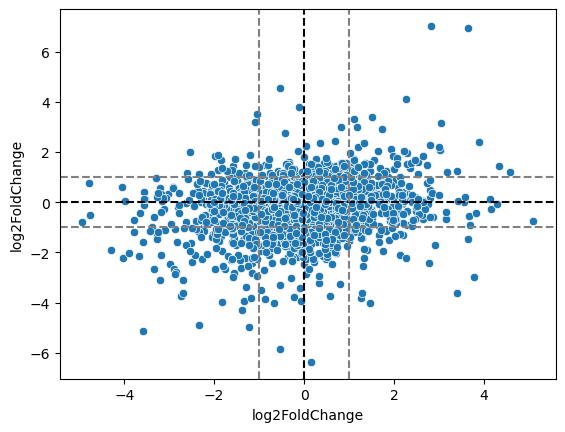

In [34]:
sns.scatterplot(x =trimmed_tomato_ortho['log2FoldChange'], y = trimmed_arabi_ortho['log2FoldChange'], )
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(1, color="grey", linestyle="--")
plt.axhline(1, color="grey", linestyle="--")
plt.axvline(-1, color="grey", linestyle="--")
plt.axhline(-1, color="grey", linestyle="--")

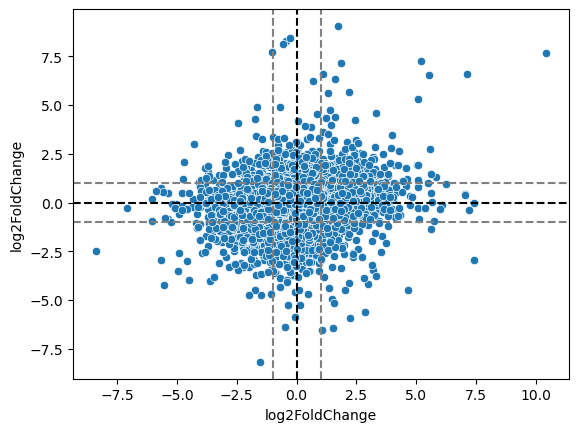

In [35]:
sns.scatterplot(x =tomato_genes_trimmed['log2FoldChange'], y = arabi_genes_trimmed['log2FoldChange'])
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(1, color="grey", linestyle="--")
plt.axhline(1, color="grey", linestyle="--")
plt.axvline(-1, color="grey", linestyle="--")
plt.axhline(-1, color="grey", linestyle="--")

In [36]:
log_fc_change_evaluation_value = 1.5
log_fc_change_evaluation_value_negative = -1*log_fc_change_evaluation_value

In [37]:
new_merged_result = pd.DataFrame(data = zip(tomato_genes_trimmed['log2FoldChange'], arabi_genes_trimmed['log2FoldChange']), columns = ['Tomato','Arabi'])

all_over_1 = new_merged_result.loc[(new_merged_result['Tomato']>log_fc_change_evaluation_value) & (new_merged_result['Arabi']>log_fc_change_evaluation_value)]
all_under_1 = new_merged_result.loc[(new_merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (new_merged_result['Arabi']<log_fc_change_evaluation_value_negative)]
discord_bottom = new_merged_result.loc[(new_merged_result['Tomato']>log_fc_change_evaluation_value) & (new_merged_result['Arabi']<log_fc_change_evaluation_value_negative)]
discord_top = new_merged_result.loc[(new_merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (new_merged_result['Arabi']>log_fc_change_evaluation_value)]

In [38]:
new_merged_result['Classification'] = 'Non-substantial'
new_merged_result['Classification'].loc[(new_merged_result['Tomato']>log_fc_change_evaluation_value) & (new_merged_result['Arabi']>log_fc_change_evaluation_value)] = 'Substantial'
new_merged_result['Classification'].loc[(new_merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (new_merged_result['Arabi']<log_fc_change_evaluation_value_negative)]= 'Substantial'
new_merged_result['Classification'].loc[(new_merged_result['Tomato']>log_fc_change_evaluation_value) & (new_merged_result['Arabi']<log_fc_change_evaluation_value_negative)]= 'Substantial'
new_merged_result['Classification'].loc[(new_merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (new_merged_result['Arabi']>log_fc_change_evaluation_value)]= 'Substantial'

/tmp/ipykernel_508966/1856289886.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  new_merged_result['Classification'].loc[(new_merged_result['Tomato']>log_fc_change_evaluation_value) & (new_merged_result['Arabi']>log_fc_change_evaluation_

Text(0.5, 0, 'Genewise log2-fold change in Tomato')

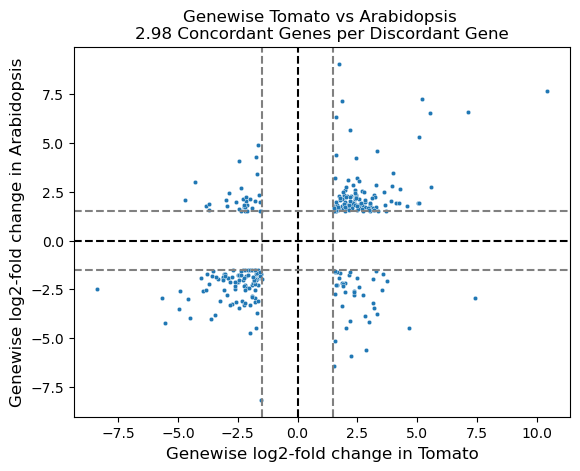

In [39]:
sns.scatterplot(data = new_merged_result.loc[new_merged_result['Classification'] == "Substantial"] , x ='Tomato', y = 'Arabi', s = 10 )
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(1.5, color="grey", linestyle="--")
plt.axhline(1.5, color="grey", linestyle="--")
plt.axvline(-1.5, color="grey", linestyle="--")
plt.axhline(-1.5, color="grey", linestyle="--")
plt.title('Genewise Tomato vs Arabidopsis \n2.98 Concordant Genes per Discordant Gene')
plt.ylabel("Genewise log2-fold change in Arabidopsis", fontsize = 12)
plt.xlabel("Genewise log2-fold change in Tomato", fontsize = 12)

In [165]:
discord_ratio = (len(all_over_1)+len(all_under_1))/(len(discord_bottom)+len(discord_top))
discord_ratio

2.986111111111111

In [124]:
all_over_1

,Tomato,Arabi
47,1.694244,1.632967
69,2.077465,2.273296
71,1.525909,1.796257
119,2.699202,2.522209
190,3.016998,1.870981
...,...,...
7191,2.202253,2.247793
7417,2.170963,2.050459
7487,2.556232,3.028377
7555,4.565852,1.792600


In [42]:
all_under_1

,Tomato,Arabi
2,-5.534877,-4.223427
6,-3.956204,-2.580977
110,-2.273082,-1.524271
305,-1.669527,-1.500678
320,-1.456021,-1.010707
...,...,...
7532,-1.245309,-1.428683
7591,-2.717277,-1.252378
7632,-2.235689,-1.920200
7671,-1.403495,-1.571900


In [43]:
merged_result

,Tomato,Arabi
0,-0.539760,0.406151
1,-0.201772,-0.128110
2,-0.531554,0.837602
3,0.484910,0.031778
4,0.081249,0.186383
...,...,...
2579,-0.345216,0.606274
2580,-1.307582,-0.299736
2581,-2.001733,0.008053
2582,0.608964,0.516576


In [44]:
merged_result = pd.DataFrame(data = zip(tomato_genes_trimmed['log2FoldChange'], arabi_genes_trimmed['log2FoldChange']), columns = ['Tomato','Arabi'])

pos_thresh = 0
neg_thresh = 0
tomato_any_change = merged_result.loc[(merged_result['Tomato']>pos_thresh)|(merged_result['Tomato']<neg_thresh)]
tomato_concordant_change = merged_result.loc[((merged_result['Tomato']>pos_thresh) & (merged_result['Arabi']>pos_thresh)) | ((merged_result['Tomato']<neg_thresh) & (merged_result['Arabi']<neg_thresh))]
tomato_disconcordant_change = merged_result.loc[((merged_result['Tomato']>pos_thresh) & (merged_result['Arabi']<neg_thresh)) | ((merged_result['Tomato']<neg_thresh) & (merged_result['Arabi']>pos_thresh))]
percent_concordant_tomato = len(tomato_concordant_change)/len(tomato_any_change)
percent_non_discord_tomato = len(tomato_concordant_change)/(len(tomato_concordant_change+tomato_disconcordant_change))
print(percent_concordant_tomato)
print(percent_non_discord_tomato)


arabi_any_change = merged_result.loc[(merged_result['Arabi']>pos_thresh)|(merged_result['Arabi']<neg_thresh)]
arabi_concordant_change = merged_result.loc[((merged_result['Arabi']>pos_thresh) & (merged_result['Tomato']>pos_thresh)) | ((merged_result['Arabi']<neg_thresh) & (merged_result['Tomato']<neg_thresh))]
arabi_disconcordant_change = merged_result.loc[((merged_result['Arabi']>pos_thresh) & (merged_result['Tomato']<neg_thresh)) | ((merged_result['Arabi']<neg_thresh) & (merged_result['Tomato']>pos_thresh))]

percent_concordant_arabi = len(arabi_concordant_change)/len(arabi_any_change)
percent_non_discord_arabi = len(arabi_concordant_change)/(len(arabi_concordant_change+arabi_disconcordant_change))

print(percent_concordant_arabi)
print(percent_non_discord_arabi)

0.544496487119438
0.544496487119438
0.544496487119438
0.544496487119438


In [45]:
stats.spearmanr(a=tomato_genes_trimmed['log2FoldChange'], b = arabi_genes_trimmed['log2FoldChange'] )

SignificanceResult(statistic=0.1691970345753542, pvalue=1.840213982841898e-50)

In [46]:
down = tomato_genes_trimmed[
    (tomato_genes_trimmed["log2FoldChange"] <= -2) & (tomato_genes_trimmed["padj"] <= 0.001)
]
up = tomato_genes_trimmed[
    (tomato_genes_trimmed["log2FoldChange"] >= 2) & (tomato_genes_trimmed["padj"] <= 0.001)
]
down_arabi = arabi_genes_trimmed[
    (arabi_genes_trimmed["log2FoldChange"] <= -2)
    & (arabi_genes_trimmed["padj"] <= 0.001)
]
up_arabi = arabi_genes_trimmed[
    (arabi_genes_trimmed["log2FoldChange"] >= 2) & (arabi_genes_trimmed["padj"] <= 0.001)
]

In [47]:
down_arabi_ortho = trimmed_arabi_ortho[
    (trimmed_arabi_ortho["log2FoldChange"] <= -2)
    & (trimmed_arabi_ortho["padj"] <= 0.001)
]
up_arabi_ortho = trimmed_arabi_ortho[
    (trimmed_arabi_ortho["log2FoldChange"] >= 2) & (trimmed_arabi_ortho["padj"] <= 0.001)]

down_ortho = trimmed_tomato_ortho[
    (trimmed_tomato_ortho["log2FoldChange"] <= -2) & (trimmed_tomato_ortho["padj"] <= 0.001)
]
up_ortho = trimmed_tomato_ortho[
    (trimmed_tomato_ortho["log2FoldChange"] >= 2) & (trimmed_tomato_ortho["padj"] <= 0.001)
]

In [48]:
len(up_arabi_ortho.merge(how = "inner", right_index = True, left_index= True, right = up_ortho))

7

In [49]:
up_ortho

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
110291at3193,2880.161235,3.023206,0.269875,11.202246,3.975232e-29,8.202700e-28
110469at3193,124.424842,3.553103,0.321172,11.062937,1.897800e-28,3.781646e-27
110509at3193,129.857990,2.809988,0.583751,4.813676,1.481787e-06,4.799573e-06
111504at3193,1479.467601,2.266930,0.198751,11.405895,3.907392e-30,8.448697e-29
11159at3193,43.727095,2.294521,0.379285,6.049599,1.452072e-09,6.896239e-09
...,...,...,...,...,...,...
885838at3193,218.609075,2.726918,0.223184,12.218224,2.484537e-34,6.601073e-33
885995at3193,8034.459578,3.012436,0.202659,14.864540,5.599789e-50,3.035085e-48
886213at3193,354.869504,3.824787,0.699740,5.466010,4.602786e-08,1.795617e-07
886816at3193,127.068018,2.190489,0.266449,8.221031,2.017606e-16,1.767579e-15


In [50]:
up_arabi_ortho

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Locus,,,,,,
117013at3193,6506.542428,2.905761,0.137886,21.073592,1.389771e-98,5.834258e-95
128908at3193,53.107943,3.789943,0.836267,4.531979,5.843352e-06,5.275353e-05
133409at3193,498.689279,2.375792,0.505993,4.695301,2.662141e-06,2.654553e-05
135138at3193,411.438908,2.127264,0.215490,9.871733,5.520246e-23,5.266817e-21
137296at3193,4485.512685,7.020351,0.747533,9.391359,5.923108e-21,4.362317e-19
139515at3193,390.760608,2.199795,0.197081,11.161889,6.264593e-29,1.051950e-26
140958at3193,504.182050,2.242707,0.236340,9.489340,2.325027e-21,1.877012e-19
208588at3193,103.642330,4.552161,0.402493,11.309903,1.172188e-29,2.050352e-27
22623at3193,23.086506,3.400070,0.685846,4.957482,7.141275e-07,7.973157e-06


In [51]:
up

,arabidopsis Symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,tomato Symbol
13,AT1G01240,773.081084,3.520915,0.253350,13.897441,6.564710e-44,2.675410e-42,LOC101256522
15,AT1G01290,30.686129,3.373121,0.548537,6.149301,7.782526e-10,3.477970e-09,LOC101247025
16,AT1G01300,395.276457,3.521809,0.215713,16.326350,6.410655e-60,5.025135e-58,LOC101254425
69,AT1G02300,1966.547707,2.077465,0.166248,12.496210,7.829576e-36,2.127266e-34,LOC101251744
93,AT1G02960,32.808280,3.367007,0.571278,5.893813,3.773834e-09,1.559744e-08,LOC101258897
...,...,...,...,...,...,...,...,...
7651,AT5G66030,700.040727,2.350113,0.184598,12.730958,3.979269e-37,1.152549e-35,LOC101254258
7652,AT5G66050,688.180123,4.720131,0.313008,15.079905,2.195843e-51,1.229472e-49,LOC101247280
7664,AT5G66540,272.875924,2.031807,0.289682,7.013925,2.317239e-12,1.329363e-11,LOC101253879
7665,AT5G66590,579.079400,2.223749,0.307813,7.224353,5.034947e-13,3.052308e-12,LOC101257731


In [52]:
up_arabi

,index,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,tomato Symbol,arabidopsis Symbol
69,37410,1704.703924,2.273296,0.226605,10.031959,1.103058e-23,1.623164e-21,LOC101251744,AT1G02300
100,46632,244.041301,4.909129,0.676055,7.261436,3.830035e-13,1.623916e-11,LOC101256498,AT1G03070
119,14336,231.147693,2.522209,0.449622,5.609616,2.027762e-08,3.529637e-07,LOC101267058,AT1G03360
126,52742,272.881762,4.077672,0.438625,9.296489,1.451593e-20,1.559438e-18,LOC101244780,AT1G03470
177,38408,427.962919,2.323308,0.354202,6.559274,5.407028e-11,1.564999e-09,LOC101248918,AT1G04620
...,...,...,...,...,...,...,...,...,...
7453,51095,352.905914,2.092255,0.297903,7.023265,2.167433e-12,8.127177e-11,LOC101266226,AT5G58370
7487,43879,431.894437,3.028377,0.377604,8.019988,1.057555e-15,6.475122e-14,LOC101265201,AT5G60040
7508,28383,1486.612708,2.066535,0.256095,8.069418,7.063405e-16,4.465245e-14,LOC101259425,AT5G61380
7528,16939,43.017272,2.709623,0.500485,5.413991,6.163523e-08,9.602265e-07,LOC101265213,AT5G62370


In [53]:
up_arabi.merge(how = "inner", on = 'arabidopsis Symbol', right = up)

,index,baseMean_x,log2FoldChange_x,lfcSE_x,stat_x,pvalue_x,padj_x,tomato Symbol_x,arabidopsis Symbol,baseMean_y,log2FoldChange_y,lfcSE_y,stat_y,pvalue_y,padj_y,tomato Symbol_y
0,37410,1704.703924,2.273296,0.226605,10.031959,1.103058e-23,1.623164e-21,LOC101251744,AT1G02300,1966.547707,2.077465,0.166248,12.496210,7.829576e-36,2.127266e-34,LOC101251744
1,14336,231.147693,2.522209,0.449622,5.609616,2.027762e-08,3.529637e-07,LOC101267058,AT1G03360,85.080935,2.699202,0.411189,6.564390,5.224628e-11,2.619566e-10,LOC101267058
2,36089,401.994829,3.122644,0.242442,12.879967,5.836084e-38,2.322629e-35,LOC101255183,AT1G15510,120.618031,2.120185,0.341672,6.205326,5.458366e-10,2.485135e-09,LOC101255183
3,28990,1760.048535,4.254156,0.291552,14.591391,3.186328e-48,2.936621e-45,LOC101255185,AT1G16030,18443.123120,2.455365,0.650977,3.771815,1.620643e-04,3.705332e-04,LOC101255185
4,254,2471.881822,2.312580,0.490882,4.711073,2.464156e-06,2.566915e-05,LOC101258429,AT1G28330,5326.247786,3.191949,0.300080,10.636989,2.005040e-26,3.162229e-25,LOC101258429
5,51541,69.046406,2.340967,0.540501,4.331110,1.483596e-05,1.217397e-04,LOC101257826,AT1G30960,203.148052,2.427976,0.240163,10.109688,5.004351e-24,6.788302e-23,LOC101257826
6,7853,316.908410,2.510030,0.251559,9.977910,1.904357e-23,2.733377e-21,LOC101244367,AT1G48460,119.503515,2.786809,0.383479,7.267182,3.670655e-13,2.248657e-12,LOC101244367
7,42732,1164.064943,2.794628,0.526201,5.310950,1.090554e-07,1.591390e-06,LOC101256536,AT1G59860,627.619958,3.931761,1.058001,3.716215,2.022296e-04,4.556350e-04,LOC101256536
8,3026,175.944756,6.525599,0.631996,10.325375,5.410687e-25,8.772828e-23,LOC101256908,AT1G68050,636.987165,5.521131,0.434430,12.708905,5.276819e-37,1.509383e-35,LOC101256908
9,36538,64.288553,2.746667,0.456799,6.012862,1.822759e-09,3.935676e-08,LOC101262206,AT1G68930,46.801826,5.570382,0.752398,7.403507,1.326338e-13,8.560779e-13,LOC101262206
